In [1]:
## Lets Take a Quick Look at the data for this Project
import pandas as pd

In [2]:
## Reading the dataset

housing = pd.read_csv(r"C:\Users\guak2001\OneDrive - Nielsen IQ\ML_Learning_projects\Housing_Project\housing.csv")
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [3]:
## There are a total of 10 attributes in the given dataset
'''
1.longitude
2.latitude 
3.housing_median_age
4.total_rooms
5.total_bed
6.rooms
7.population
8.households
9.median_income 
10.median_house_value
11.ocean_proximity

'''

'\n1.longitude\n2.latitude \n3.housing_median_age\n4.total_rooms\n5.total_bed\n6.rooms\n7.population\n8.households\n9.median_income \n10.median_house_value\n11.ocean_proximity\n\n'

In [4]:
'''
The info() method is useful to get a quick description of the data, in particular the
total number of rows, and each attribute’s type and number of non-null values
'''

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
'''

There are 20,640 instances in the dataset, which means that it is fairly small by
Machine Learning standards, but it’s perfect to get started. Notice that the total_bed
rooms attribute has only 20,433 non-null values, meaning that 207 districts are miss‐
ing this feature.

We will look at this later

'''

'\n\nThere are 20,640 instances in the dataset, which means that it is fairly small by\nMachine Learning standards, but it’s perfect to get started. Notice that the total_bed\nrooms attribute has only 20,433 non-null values, meaning that 207 districts are miss‐\ning this feature.\n\nWe will look at this later\n\n'

In [6]:
'''All attributes are numerical, except the ocean_proximity field. Its type is object'''

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
## Lets use the describe function to get a five point summary
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
## Now lets start with the Exploratory Data Analysis for this data 

##1. Univariate Analysis

#####  a. We will plot histogram of all the Numerical variables to get more understanding of the data

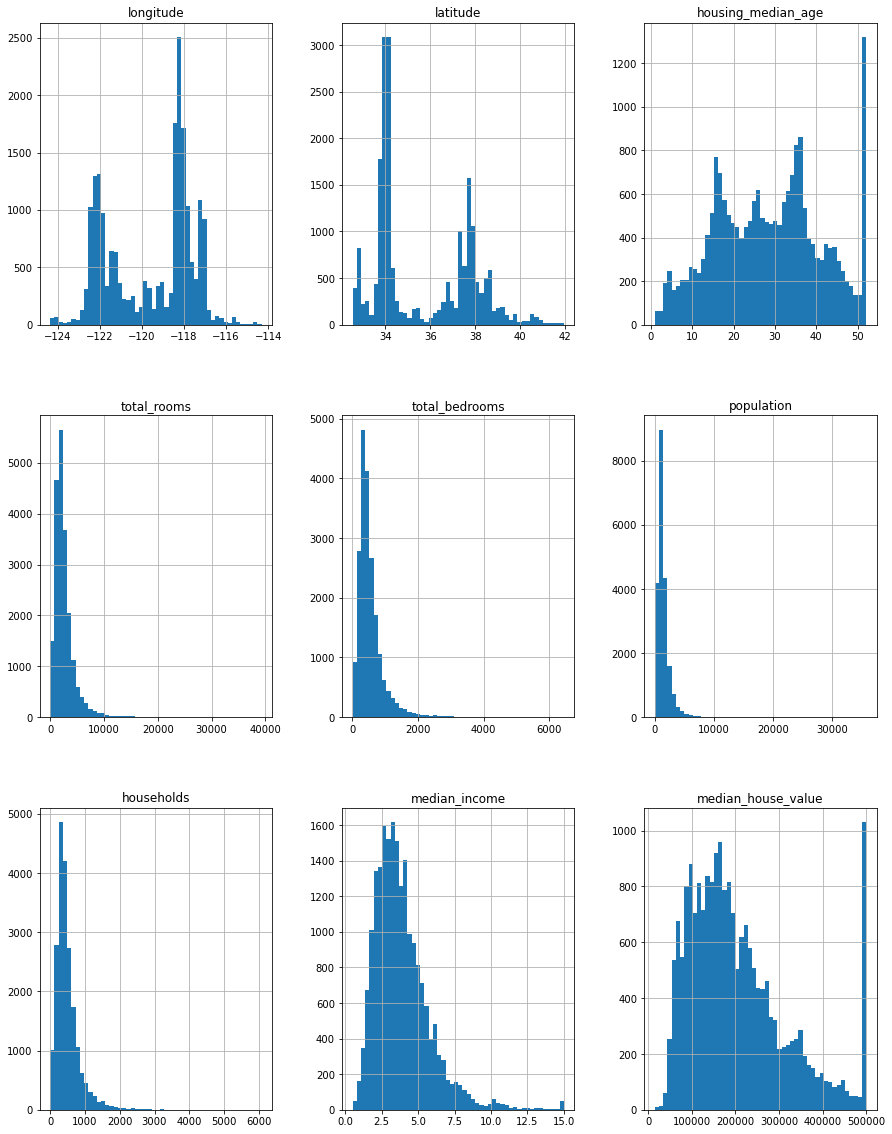

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(15,20))
plt.show()

In [10]:
## Some Deductions from the Univariate analaysis that we performed using histograms

'''

1. The housing median age and the median house value were also capped. The latter
may be a serious problem since it is our target attribute (your labels). our
Machine Learning algorithms may learn that prices never go beyond that limit.
There are 2 solutions to this
    a. We can include those districts with median value > 50000$ to train our model more precisely
    b. We can exclude those districts with median value > 50000$ from our training as well as testing dataset in order ato build a good model.


2.Many histograms are tail heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions

'''

'\n\n1. The housing median age and the median house value were also capped. The latter\nmay be a serious problem since it is our target attribute (your labels). our\nMachine Learning algorithms may learn that prices never go beyond that limit.\nThere are 2 solutions to this\n    a. We can include those districts with median value > 50000$ to train our model more precisely\n    b. We can exclude those districts with median value > 50000$ from our training as well as testing dataset in order ato build a good model.\n\n\n2.Many histograms are tail heavy: they extend much farther to the right of\nthe median than to the left. This may make it a bit harder for some Machine\nLearning algorithms to detect patterns. We will try transforming these attributes\nlater on to have more bell-shaped distributions\n\n'

In [11]:
## as we have completed a basic EDA onto the given data set we will move to next step
## Which is we will create a test and training dataset from the whole data

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [12]:
'''
1. The train_test_split method is basically using a random sampling method.
   This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it
   is not, you run the risk of introducing a significant sampling bias.

2. So Lets Try Stratified Random Sampling approach and assuming that Median Income is a very important attribute for
   target variable.
 
 a. Since the median income is a continuous numerical attribute, you first need to create
    an income category attribute. 

Let’s look at the median income histogram more closely
 
 1. most median income values are clustered around 1.5 to 6 (i.e.,
$15,000–$60,000), but some median incomes go far beyond 6. 

 2. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate
of the stratum’s importance may be biased. This means that you should not have too
many strata, and each stratum should be large enough. 

We will use pd.cut() function to create an income category attribute with 5 categories (labeled
from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from
1.5 to 3, and so on

'''

'\n1. The train_test_split method is basically using a random sampling method.\n   This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it\n   is not, you run the risk of introducing a significant sampling bias.\n\n2. So Lets Try Stratified Random Sampling approach and assuming that Median Income is a very important attribute for\n   target variable.\n \n a. Since the median income is a continuous numerical attribute, you first need to create\n    an income category attribute. \n\nLet’s look at the median income histogram more closely\n \n 1. most median income values are clustered around 1.5 to 6 (i.e.,\n$15,000–$60,000), but some median incomes go far beyond 6. \n\n 2. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate\nof the stratum’s importance may be biased. This means that you should not have too\nmany strata, and each stratum should be large enough. \n\nWe wi

<AxesSubplot:>

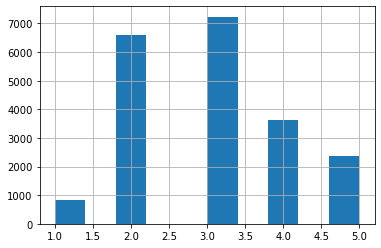

In [13]:
import numpy as np
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0.,1.5,3,4.5,6,np.inf],labels = [1,2,3,4,5])
housing['income_cat'].hist()

In [14]:
'''Now you are ready to do stratified sampling based on the income category. For this
   We can use Scikit-Learn’s StratifiedShuffleSplit class'''

'Now you are ready to do stratified sampling based on the income category. For this\n   We can use Scikit-Learn’s StratifiedShuffleSplit class'

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=20)

for train_index , test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

''' Now we will compare the income category proportions in the overall dataset,

1.in the test set generated with stratified sampling, and in a test set generated using purely
random sampling. As you can see, the test set generated using stratified sampling has
income category proportions almost identical to those in the full dataset, whereas the
test set generated using purely random sampling is quite skewed.'''



In [17]:
## Now we will remove the income_cat attribute so the data is back to its original state.

for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis =1 , inplace= True)

In [18]:
## lets create a copy of our training set and do some more exploration on the data

housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

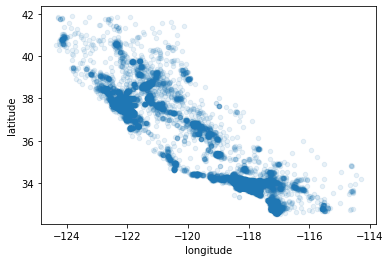

In [19]:
## Visualize Geographicak data 

## Since there is geographical information (latitude and longitude), it is a good idea to
## create a scatterplot of all districts to visualize the data

housing.plot(kind = 'scatter' , x='longitude', y = 'latitude', alpha = 0.1)

In [20]:
## Can't observe any specific pattern so moving ahead with calculating correlations

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values()

latitude             -0.141972
longitude            -0.047162
population           -0.030131
total_bedrooms        0.046345
households            0.063182
housing_median_age    0.116048
total_rooms           0.131806
median_income         0.686379
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

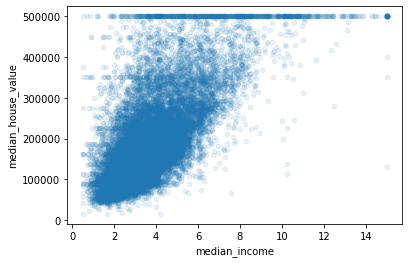

In [21]:
## The most promising attribute to predict the median house value is the median
## income, so let’s zoom in on their correlation scatterplot

housing.plot(kind = 'scatter', x = 'median_income' , y = 'median_house_value', alpha = 0.1)

In [22]:
## Preparing the data for Machine Learning algorithm

housing = strat_train_set.drop('median_house_value', axis= 1)
housing_labels = strat_train_set['median_house_value'].copy() 

## Data Cleaning 

'''
Most Machine Learning algorithms cannot work with missing features, so let’s create
a few functions to take care of them. we noticed earlier that the total_bedrooms
attribute has some missing values, so let’s fix this. we have three options:

• Get rid of the corresponding districts.
• Get rid of the whole attribute.
• Set the values to some value (zero, the mean, the median, etc.).


Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.
Here is how to use it. First, you need to create a SimpleImputer instance, specifying
that you want to replace each attribute’s missing values with the median of that
attribute:

'''

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

##  Since the median can only be computed on numerical attributes, we need to create a
##  copy of the data without the text attribute ocean_proximity

housing_num = housing.drop('ocean_proximity', axis = 1)

## Now you can fit the imputer instance to the training data using the fit() method

imputer.fit(housing_num)

## we can check the median of all the attributes. They are stored in Imputer statistic

imputer.statistics_

## Now you can use this “trained” imputer to transform the training set by replacing
## missing values by the learned medians

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [25]:

##  Handling Text and categorical variable 

housing_cat = housing[['ocean_proximity']]
housing_cat.head()

# Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert
# these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder 

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

# You can get the list of categories using the categories_ instance variable. It is a list
# containing a 1D array of categories for each categorical attribute

encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [26]:
'''
One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. 

This may be fine in some cases (e.g.,
for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously
not the case for the ocean_proximity column (for example, categories 0 and 4 are
clearly more similar than categories 0 and 1). 

To fix this issue, a common solution is to create one binary attribute per category:

one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), 
another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. 

This is called one-hot encoding, because
only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new
attributes are sometimes called dummy attributes. 

'''

'\nOne issue with this representation is that ML algorithms will assume that two nearby\nvalues are more similar than two distant values. \n\nThis may be fine in some cases (e.g.,\nfor ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously\nnot the case for the ocean_proximity column (for example, categories 0 and 4 are\nclearly more similar than categories 0 and 1). \n\nTo fix this issue, a common solution is to create one binary attribute per category:\n\none attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), \nanother attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. \n\nThis is called one-hot encoding, because\nonly one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new\nattributes are sometimes called dummy attributes. \n\n'

In [27]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_cat_one_hot = one_hot_encoder.fit_transform(housing_cat)
housing_cat_one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [28]:
## Feature Scaling


'''

One of the most important transformations you need to apply to your data is feature
scaling. With few exceptions, Machine Learning algorithms don’t perform well when
the input numerical attributes have very different scales. This is the case for the housing
data: the total number of rooms ranges from about 6 to 39,320, while the median
incomes only range from 0 to 15. Note that scaling the target values is generally not
required.

'''

'''

There are two common ways to get all attributes to have the same scale: min-max
scaling and standardization

'''

'\n\nThere are two common ways to get all attributes to have the same scale: min-max\nscaling and standardization\n\n'

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('std_scaler',StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [30]:
'''

So far, we have handled the categorical columns and the numerical columns separately.
It would be more convenient to have a single transformer able to handle all columns,
applying the appropriate transformations to each column. In version 0.20,
Scikit-Learn introduced the ColumnTransformer for this purpose

'''

'\n\nSo far, we have handled the categorical columns and the numerical columns separately.\nIt would be more convenient to have a single transformer able to handle all columns,\napplying the appropriate transformations to each column. In version 0.20,\nScikit-Learn introduced the ColumnTransformer for this purpose\n\n'

In [31]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [32]:
## Training a model 
## Using Linear regression at first 

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [33]:
## Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels , housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68749.0951299438

In [34]:
## Training a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_predictions_tree = tree_reg.predict(housing_prepared)
tree_reg_mse = mean_squared_error(housing_labels, housing_predictions_tree)
tree_reg_rmse = np.sqrt(tree_reg_mse)
tree_reg_rmse

0.0

In [35]:
## Assumption is This new model is very badly overfitting the data
## Trying K Fold cross validation to support this assumption

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([66577.47833876, 63407.57807663, 68311.12313759, 68151.89991177,
       66895.03743531, 69382.93030771, 67938.53384779, 72711.43441482,
       66738.80523963, 71351.09154885])

In [36]:
## comparing this model with linear regression

lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,cv=10,scoring='neg_mean_squared_error')
lin_scores_rmse = np.sqrt(-lin_scores)
lin_scores_rmse

array([64644.05970752, 67609.22907968, 69557.79995821, 67326.40033065,
       68939.96855951, 67484.69222637, 67695.2985021 , 71541.16677652,
       68523.62286315, 75707.6869291 ])

In [37]:
## So our assumption was right and both of models are not looking good
## Trying Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor
Random_forest = RandomForestRegressor()
Random_forest.fit(housing_prepared,housing_labels)
Random_forest_predictions = Random_forest.predict(housing_prepared)
Random_forest_mse = mean_squared_error(housing_labels,Random_forest_predictions)
Random_forest_rmse = np.sqrt(Random_forest_mse)
Random_forest_rmse

18234.293710451042

In [38]:
## Lets check this Classifier on multiple validation sets with the help of cross validation
from sklearn.model_selection import cross_val_score
Random_forest_scores = cross_val_score(Random_forest,housing_prepared,housing_labels,cv=10,scoring='neg_mean_squared_error')
Random_forest_rmse_validation = np.sqrt(-Random_forest_scores)
Random_forest_rmse_validation

array([46829.90226952, 47604.99506023, 50356.11979511, 49003.27089221,
       47525.98580448, 50030.06272428, 46972.46602321, 52670.23048868,
       46044.48126027, 52265.51256627])

Random Forests look very promising. However, note that
the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set. Possible solutions for overfitting are
to simplify the model, constrain it (i.e., regularize it), or get a lot more training data

### Fine-Tune our Model

GridSearchCV

One way to Fine tune our Model that would be to fiddle with the hyperparameters manually, until you
find a great combination of hyperparameter values. This would be very tedious work,
and you may not have time to explore many combinations.
Instead we will use Scikit-Learn’s GridSearchCV to search for you. All we need to
do is tell it which hyperparameters you want it to experiment with, and what values to
try out, and it will evaluate all the possible combinations of hyperparameter values,
using cross-validation. For example, the following code searches for the best combi‐
nation of hyperparameter values for the RandomForestRegressor

In [43]:
from sklearn.model_selection import GridSearchCV
forest_reg = RandomForestRegressor()
params_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]
grid_search = GridSearchCV(forest_reg,params_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of
n_estimators and max_features hyperparameter values specified in the first dict
then try all 2 × 3 = 6 combinations of hyperparameter values in the
second dict, but this time with the bootstrap hyperparameter set to False instead of
True (which is the default value for this hyperparameter).
All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRe
gressor hyperparameter values, and it will train each model five times (since we are
using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90
rounds of training

In [44]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [45]:
## we can also get the estimator directly
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [46]:
## we can also check evaluation scores
cvres = grid_search.cv_results_
for mean_score , params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

64144.25889519347 {'max_features': 2, 'n_estimators': 3}
55140.784852830206 {'max_features': 2, 'n_estimators': 10}
52347.766920603484 {'max_features': 2, 'n_estimators': 30}
59161.871140300136 {'max_features': 4, 'n_estimators': 3}
52585.245002384814 {'max_features': 4, 'n_estimators': 10}
50333.52395496944 {'max_features': 4, 'n_estimators': 30}
58528.0171941471 {'max_features': 6, 'n_estimators': 3}
52068.57075422996 {'max_features': 6, 'n_estimators': 10}
49944.28906546544 {'max_features': 6, 'n_estimators': 30}
58246.08801823106 {'max_features': 8, 'n_estimators': 3}
51325.36352346621 {'max_features': 8, 'n_estimators': 10}
49604.69565647198 {'max_features': 8, 'n_estimators': 30}
62020.416450026976 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54600.12029103472 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59798.025168101696 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52073.42769561956 {'bootstrap': False, 'max_features': 3, 'n_estimators

### Analyze the Best Models and Their Errors
we will gain good insights on the problem by inspecting the best models. For
example, the RandomForestRegressor can indicate the relative importance of each
attribute for making accurate predictions:

In [47]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([1.15689680e-01, 1.05541383e-01, 4.93608929e-02, 3.18685875e-02,
       2.65736741e-02, 4.11372133e-02, 2.50409469e-02, 4.15109418e-01,
       5.97880741e-03, 1.74953987e-01, 4.63486065e-05, 2.94706033e-03,
       5.75200113e-03])

In [48]:
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance,attributes),reverse=True)

[(0.41510941791866357, 'median_income'),
 (0.1749539870774847, 'pop_per_hhold'),
 (0.11568968012422874, 'longitude'),
 (0.10554138270466806, 'latitude'),
 (0.0493608928671769, 'housing_median_age'),
 (0.04113721329746148, 'population'),
 (0.03186858749485371, 'total_rooms'),
 (0.026573674094862835, 'total_bedrooms'),
 (0.025040946942197138, 'households'),
 (0.005978807410418894, 'rooms_per_hhold'),
 (0.005752001127124979, 'INLAND'),
 (0.0029470603343382845, '<1H OCEAN'),
 (4.634860652072105e-05, 'bedrooms_per_room')]

### Evaluate our System on the Test Set

After tweaking our models for a while, we eventually have a system that performs
sufficiently well. Now is the time to evaluate the final model on the test set. There is
nothing special about this process; just get the predictors and the labels from our
test set, run our full_pipeline to transform the data, and evaluate the final model
on the test set

In [54]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


48428.30479308816